In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("titanic.csv")
df.head()
#df.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace =True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
target = df.Survived
inputs = df.drop('Survived', axis='columns')

In [7]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [8]:
inputs = pd.concat([inputs,dummies], axis = 'columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [9]:
inputs.drop('Sex',axis ='columns', inplace = True)
inputs.head(3)            

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [10]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [11]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [12]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1


In [13]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [15]:
len(X_train)

712

In [16]:
len(X_test)

179

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [18]:
model.fit(X_train, y_train)

GaussianNB()

In [19]:
model.score(X_test, y_test)

0.7541899441340782

In [20]:
X_test[:10]

,Pclass,Age,Fare,female,male
742,1,21.000000,262.3750,1,0
846,3,29.699118,69.5500,0,1
688,3,18.000000,7.7958,0,1
126,3,29.699118,7.7500,0,1
93,3,26.000000,20.5750,0,1
259,2,50.000000,26.0000,1,0
530,2,2.000000,26.0000,1,0
620,3,27.000000,14.4542,0,1
445,1,4.000000,81.8583,0,1
695,2,52.000000,13.5000,0,1


In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.77622378, 0.82517483, 0.75352113, 0.78169014, 0.8028169 ])

In [22]:
y_test[:10]

742    1
846    0
688    0
126    0
93     0
259    1
530    1
620    0
445    1
695    0
Name: Survived, dtype: int64

In [23]:
model.predict(X_test[:10])

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [24]:
model.predict_proba(X_test[:10])

array([[5.83695103e-12, 1.00000000e+00],
       [9.77377663e-01, 2.26223371e-02],
       [9.89621302e-01, 1.03786979e-02],
       [9.91429165e-01, 8.57083452e-03],
       [9.91184410e-01, 8.81558997e-03],
       [2.40552863e-02, 9.75944714e-01],
       [1.27371137e-02, 9.87262886e-01],
       [9.91368389e-01, 8.63161072e-03],
       [6.50661494e-01, 3.49338506e-01],
       [9.79629481e-01, 2.03705193e-02]])

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [26]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[95 18]
 [26 40]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       113
           1       0.69      0.61      0.65        66

    accuracy                           0.75       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.75      0.75      0.75       179

0.7541899441340782


<function matplotlib.pyplot.show(close=None, block=None)>

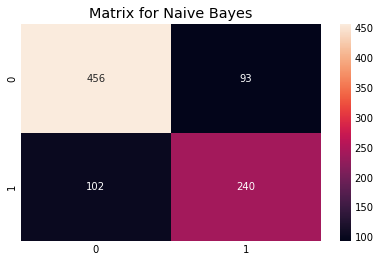

In [31]:
y_pred = cross_val_predict(GaussianNB(),inputs,target,cv=10)
sns.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='2.0f')
plt.title('Confusion Matrix for Naive Bayes')
plt.show